# **Salary Predictions of Data Professions**
**Mayank Pujara |** mayankpujara25@gmail.com

---
This project is designed to harness the power of regression techniques to forecast the salaries of data professionals.The project aims to build regression models that accurately predict salaries based on these factors. The salaries in the field of data professions are influenced by various factors, including experience, job roles, and performance. Accurate salary predictions play a pivotal role for both job seekers and employers, aiding in negotiations and informed hiring decisions. The goal is to provide valuable insights for job seekers negotiating compensation and employers making informed hiring decisions.

## **Importing necessary Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import warnings
%matplotlib inline

**Loading the CSV file into a Pandas DataFrame**

In [2]:
data = pd.read_csv("Salary Prediction of Data Professions.csv")

## **Data Preprocessing & Cleaning**

In [3]:
data.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


In [4]:
data.shape

(2639, 13)

In [5]:
data.isna().sum()

FIRST NAME          0
LAST NAME           2
SEX                 0
DOJ                 1
CURRENT DATE        0
DESIGNATION         0
AGE                 3
SALARY              0
UNIT                0
LEAVES USED         3
LEAVES REMAINING    2
RATINGS             2
PAST EXP            0
dtype: int64

### **Handling missing values**

In [6]:
# For categorical columns
data['LAST NAME'].fillna(data['LAST NAME'].mode()[0], inplace=True)
data['DOJ'].fillna(data['DOJ'].mode()[0], inplace=True)

# For numerical columns
data['AGE'].fillna(data['AGE'].median(), inplace=True)
data['LEAVES USED'].fillna(data['LEAVES USED'].mean(), inplace=True)
data['LEAVES REMAINING'].fillna(data['LEAVES REMAINING'].median(), inplace=True)
data['RATINGS'].fillna(data['RATINGS'].mean(), inplace=True)

In [7]:
data.isna().sum()

FIRST NAME          0
LAST NAME           0
SEX                 0
DOJ                 0
CURRENT DATE        0
DESIGNATION         0
AGE                 0
SALARY              0
UNIT                0
LEAVES USED         0
LEAVES REMAINING    0
RATINGS             0
PAST EXP            0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST NAME        2639 non-null   object 
 1   LAST NAME         2639 non-null   object 
 2   SEX               2639 non-null   object 
 3   DOJ               2639 non-null   object 
 4   CURRENT DATE      2639 non-null   object 
 5   DESIGNATION       2639 non-null   object 
 6   AGE               2639 non-null   float64
 7   SALARY            2639 non-null   int64  
 8   UNIT              2639 non-null   object 
 9   LEAVES USED       2639 non-null   float64
 10  LEAVES REMAINING  2639 non-null   float64
 11  RATINGS           2639 non-null   float64
 12  PAST EXP          2639 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 268.1+ KB


In [9]:
data.describe()

,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
count,2639.000000,2639.000000,2639.000000,2639.000000,2639.000000,2639.000000
mean,24.755589,58136.678287,22.501517,7.503600,3.486159,1.566881
std,3.906088,36876.956944,4.601850,4.601468,1.114510,2.728416
min,21.000000,40001.000000,15.000000,0.000000,2.000000,0.000000
25%,22.000000,43418.000000,19.000000,4.000000,2.000000,0.000000
50%,24.000000,46781.000000,22.501517,8.000000,3.000000,1.000000
75%,25.000000,51401.500000,26.000000,11.000000,4.000000,2.000000
max,45.000000,388112.000000,30.000000,15.000000,5.000000,23.000000


## **Exploratory Data Analysis (EDA):**

In [10]:
print("Categories in the 'DESIGNATION' column are:", data['DESIGNATION'].unique())
print("Categories in the 'SEX' column are:", data['SEX'].unique())
print("Categories in the 'UNIT' column are:", data['UNIT'].unique())

Categories in the 'DESIGNATION' column are: ['Analyst' 'Associate' 'Senior Analyst' 'Senior Manager' 'Manager'
 'Director']
Categories in the 'SEX' column are: ['F' 'M']
Categories in the 'UNIT' column are: ['Finance' 'Web' 'IT' 'Operations' 'Marketing' 'Management']


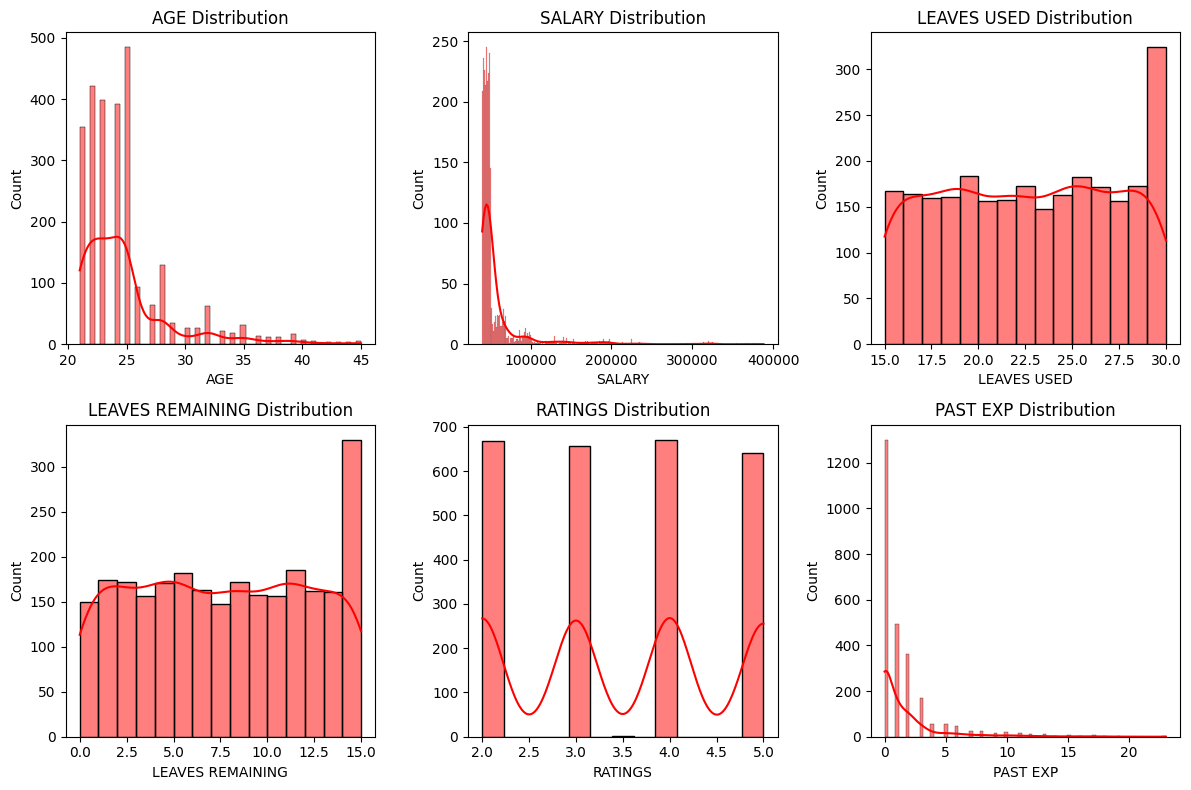

In [11]:
numericalFeatures = ['AGE', 'SALARY', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS', 'PAST EXP']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(numericalFeatures, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[feature], kde=True, color='red')
    plt.title(f'{feature} Distribution')
plt.tight_layout()
plt.show()

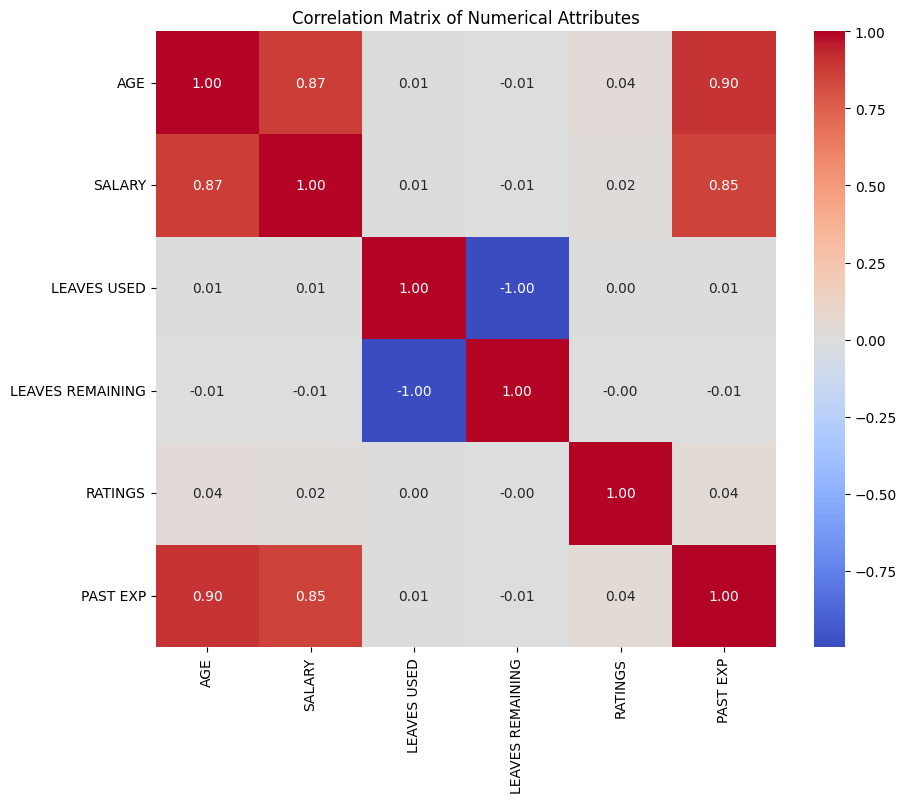

In [12]:
correlation_matrix = data[numericalFeatures].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Attributes')
plt.show()

- Values close to 1 indicate a strong positive correlation.
- Values close to -1 indicate a strong negative correlation.
- Values close to 0 indicate a weak or no linear correlation.

In [13]:
designation = data.groupby('DESIGNATION').agg({'SALARY':'mean'})
designation.reset_index(inplace=True)
designation

,DESIGNATION,SALARY
0,Analyst,45020.111852
1,Associate,87202.981132
2,Director,286971.187500
3,Manager,126272.592593
4,Senior Analyst,59901.345506
5,Senior Manager,178664.274194


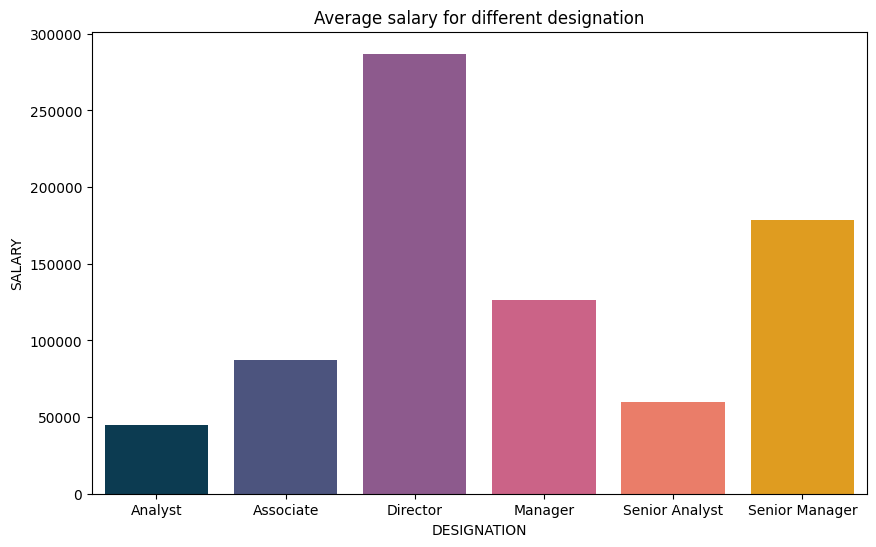

In [14]:
colors = ['#003f5c', '#444e86', '#955196', '#dd5182', '#ff6e54', '#ffa600']

plt.figure(figsize=(10, 6))
sns.barplot(x='DESIGNATION', y='SALARY', hue='DESIGNATION', data=designation, palette=colors)
plt.title('Average salary for different designation')
plt.show()

In [15]:
X = data.drop(columns=['FIRST NAME', 'LAST NAME', 'DOJ', 'CURRENT DATE', 'LEAVES USED', 'LEAVES REMAINING', 'SALARY'],axis=1)
X.head()

,SEX,DESIGNATION,AGE,UNIT,RATINGS,PAST EXP
0,F,Analyst,21.0,Finance,2.000000,0
1,F,Associate,24.0,Web,3.486159,7
2,F,Analyst,21.0,Finance,3.000000,0
3,F,Analyst,22.0,IT,3.000000,0
4,M,Analyst,24.0,Operations,3.486159,3


In [16]:
y = data['SALARY']
y

0        44570
1        89207
2        40955
3        45550
4        43161
         ...  
2634    185977
2635     45758
2636     47315
2637     45172
2638     49176
Name: SALARY, Length: 2639, dtype: int64

## Feature Engineering

In [17]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numericalFeatures = X.select_dtypes(exclude="object").columns
categoricalFeatures = ['SEX', 'DESIGNATION', 'UNIT']
numericalTransformer = StandardScaler()
oneHotTransformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('OneHotEncoder', oneHotTransformer, categoricalFeatures),
        ('StandardScaler', numericalTransformer, numericalFeatures)
    ],
    remainder='passthrough'
)

# Applying the ColumnTransformer to the dataset
X = preprocessor.fit_transform(X)

In [18]:
X.shape

(2639, 17)

### **Splitting the data into training and testing sets**

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((2111, 17), (528, 17))

## **Model Implementation**

In [20]:
# Function to evaluate the model's performance
def evaluateModelPerformance(trueValue, predictedValue):
    meanAbsoluteErr = mean_absolute_error(trueValue, predictedValue)
    rootMeanSquaredErr = np.sqrt(mean_squared_error(trueValue, predictedValue))
    r2Score = r2_score(trueValue, predictedValue)
    return meanAbsoluteErr, rootMeanSquaredErr, r2Score

In [21]:
models = {
    "Linear Regressions": LinearRegression(),
    "K Nearest Regressor": KNeighborsRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3),
    "LightGBM": LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
}

modelList = []
r2ScoreList = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    
    # Making predictions
    y_pred = model.predict(X_test)
    
    # Evaluating the model's performance
    modelMAE, modelRMSE, modelR2Score = evaluateModelPerformance(y_test, y_pred)

    print(list(models.keys())[i])
    modelList.append(list(models.keys())[i])
    
    print('Model Performance:')
    print("- Mean Absolute Error: {:.3f}".format(modelMAE))
    print("- Root Mean Squared Error: {:.3f}".format(modelRMSE))
    print("- R2 Score: {:.3f}".format(modelR2Score))
    r2ScoreList.append(modelR2Score)
    print("--------------------------------------------")

Linear Regressions
Model Performance:
- Mean Absolute Error: 4636.581
- Root Mean Squared Error: 9787.012
- R2 Score: 0.942
--------------------------------------------
K Nearest Regressor
Model Performance:
- Mean Absolute Error: 4857.775
- Root Mean Squared Error: 11241.184
- R2 Score: 0.924
--------------------------------------------
Random Forest Regressor
Model Performance:
- Mean Absolute Error: 4737.018
- Root Mean Squared Error: 10993.494
- R2 Score: 0.927
--------------------------------------------
Decision Tree
Model Performance:
- Mean Absolute Error: 4979.474
- Root Mean Squared Error: 12746.395
- R2 Score: 0.902
--------------------------------------------
XGBoost
Model Performance:
- Mean Absolute Error: 4714.406
- Root Mean Squared Error: 11683.488
- R2 Score: 0.918
--------------------------------------------
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000282 seconds.
You can set `force_row_wise=true` to remove the overhead.

To determine the best model the following factors must be evaluated:
- *Mean Absolute Error (MAE):* Lower MAE values indicate better accuracy.
- *Root Mean Squared Error (RMSE):* Lower RMSE values indicate better accuracy, similar to MAE.
- *R2 Score:* A higher R2 score indicates a better fit of the model to the data.

Based on the provided metrics, **The Linear Regression model** appears to be the best choice among all the models evaluated. It has the highest R2 score **(0.942)**, indicating a strong fit, and the lowest RMSE **(9787.012)**, indicating better accuracy in predicting the target variable.

In [22]:
linearRegModel = LinearRegression(fit_intercept=True)
linearRegModel = linearRegModel.fit(X_train, y_train)
y_pred = linearRegModel.predict(X_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy of the Linear Regression Model is %.2f" %score)

Accuracy of the Linear Regression Model is 94.23


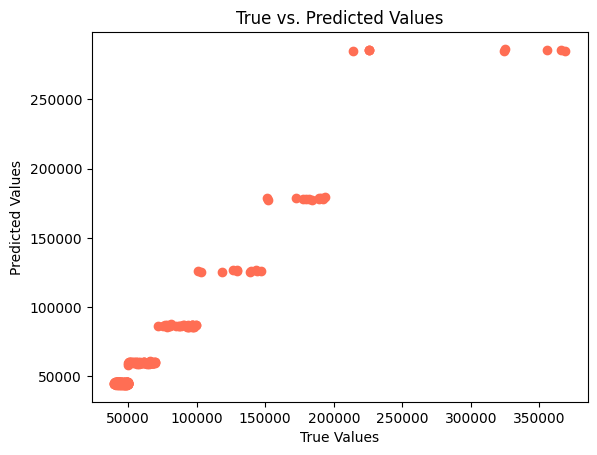

In [23]:
plt.scatter(y_test,y_pred, color = "#ff6e54")
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values')
plt.show()